In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
db = pd.read_csv("/content/diabetes.csv")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
x = db.drop("Outcome", axis=1)
y = db["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [81]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
model_rf = clf.fit(x_train, y_train)

preds = model_rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, preds)

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(gamma="auto")
cv_result = cross_val_score(svc, x_train, y_train, cv=10, scoring="accuracy")

In [84]:
import tensorflow as tf

tf.random.set_seed(42)

model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_nn.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

history = model_nn.fit(x_train, y_train, epochs=30)

Epoch 1/30
20/20 [==============================] - 1s 3ms/step - loss: 0.6906 - accuracy: 0.5114
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6417
Epoch 3/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.7068
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.7166
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.7248
Epoch 6/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.7362
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7378
Epoch 8/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5787 - accuracy: 0.7427
Epoch 9/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7459
Epoch 10/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7557
Epoch 11/30
20/20 [

In [85]:
preds_nn = model_nn.predict(x_test)
preds_nn

5/5 [==============================] - 0s 3ms/step


array([[0.2915296 ],
       [0.22685817],
       [0.09559417],
       [0.27604946],
       [0.41538918],
       [0.31852123],
       [0.01736359],
       [0.6291671 ],
       [0.6451154 ],
       [0.6767533 ],
       [0.25244752],
       [0.90275   ],
       [0.15468363],
       [0.3276671 ],
       [0.08158011],
       [0.3470823 ],
       [0.28484532],
       [0.12966557],
       [0.88285536],
       [0.6086846 ],
       [0.21727866],
       [0.10475001],
       [0.26241398],
       [0.09400012],
       [0.444184  ],
       [0.86817193],
       [0.15166001],
       [0.02590687],
       [0.28446475],
       [0.11678944],
       [0.9305918 ],
       [0.82001376],
       [0.80614877],
       [0.8709026 ],
       [0.5940256 ],
       [0.6969152 ],
       [0.986417  ],
       [0.33386245],
       [0.28324163],
       [0.83654875],
       [0.09402379],
       [0.4656142 ],
       [0.45761138],
       [0.27301136],
       [0.0438939 ],
       [0.59417444],
       [0.7233753 ],
       [0.251

In [86]:
accuracy = model_nn.evaluate(x_test, y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7727


Text(0.5, 0, 'epochs')

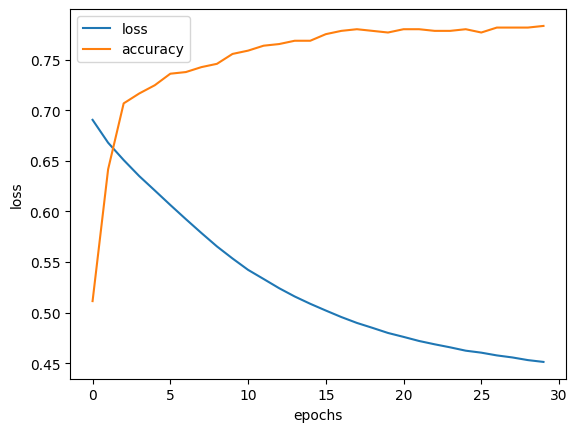

In [87]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [88]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN().fit(x_train, y_train)

y_knn = knn.predict(x_test)

In [89]:
print("Acertividade do modelo de RandomForest {:.2%}".format(accuracy_rf))
print("Acertividade com SVM: {:.2%}".format(cv_result.mean()))
print("Acertividade da rede neural: {:.2%}".format(accuracy))
print("Acertividade do modelo de KNN foi : {:.2%}".format(accuracy_score(y_test, y_knn)))

Acertividade do modelo de RandomForest 76.62%
Acertividade com SVM: 76.69%
Acertividade da rede neural: 77.27%
Acertividade do modelo de KNN foi : 69.48%
